In [19]:
import numpy as np
import xarray as xr
import math
import matplotlib.pyplot as plt

%matplotlib inline

In [30]:
ds_alpha_0 = xr.open_dataset('/data/jpetrie/MEOPAR/SalishSea/results/mesozoo_alpha_changes/nampismezo_zz_rate_mesozoo_alpha_0/SS5x5_1h_20150201_20150205_ptrc_T.nc')
ds_alpha_half = xr.open_dataset('/data/jpetrie/MEOPAR/SalishSea/results/mesozoo_alpha_changes/nampismezo_zz_rate_mesozoo_alpha_0.5/SS5x5_1h_20150201_20150205_ptrc_T.nc')
ds_alpha_1 = xr.open_dataset('/data/jpetrie/MEOPAR/SalishSea/results/mesozoo_alpha_changes/nampismezo_zz_rate_mesozoo_alpha_1/SS5x5_1h_20150201_20150205_ptrc_T.nc')

In [31]:
print(ds_alpha_0)

<xarray.Dataset>
Dimensions:               (axis_nbounds: 2, deptht: 40, time_counter: 120, x: 5, y: 5)
Coordinates:
  * deptht                (deptht) float32 1.28205 3.84615 6.41026 8.97436 ...
    nav_lat               (y, x) float32 -0.5 -0.5 -0.5 -0.5 -0.5 0.0 0.0 ...
    nav_lon               (y, x) float32 0.0 0.5 1.0 1.5 2.0 0.0 0.5 1.0 1.5 ...
    time_centered         (time_counter) datetime64[ns] 2015-02-01T00:30:00 ...
  * time_counter          (time_counter) datetime64[ns] 2015-02-01T00:30:00 ...
  * axis_nbounds          (axis_nbounds) int64 0 1
  * x                     (x) int64 0 1 2 3 4
  * y                     (y) int64 0 1 2 3 4
Data variables:
    DOC                   (time_counter, deptht, y, x) float64 0.0 0.0 0.0 ...
    MICZ                  (time_counter, deptht, y, x) float64 0.0 0.0 0.0 ...
    MYRI                  (time_counter, deptht, y, x) float64 0.0 0.0 0.0 ...
    NH4                   (time_counter, deptht, y, x) float64 0.0 0.0 0.0 ...
    NO3   

In [32]:
print(ds_alpha_0.dims)
print(ds_alpha_1.dims)

Frozen(SortedKeysDict({'axis_nbounds': 2, 'x': 5, 'time_counter': 120, 'y': 5, 'deptht': 40}))
Frozen(SortedKeysDict({'axis_nbounds': 2, 'x': 5, 'time_counter': 120, 'y': 5, 'deptht': 40}))


In [33]:
ds_alpha_0.PHY.attrs

OrderedDict([('long_name', '(Nano)Phytoplankton Concentration'),
             ('units', 'mmol/m3'),
             ('online_operation', 'average'),
             ('interval_operation', '40 s'),
             ('interval_write', '1 h'),
             ('cell_methods', 'time: mean (interval: 40 s)')])

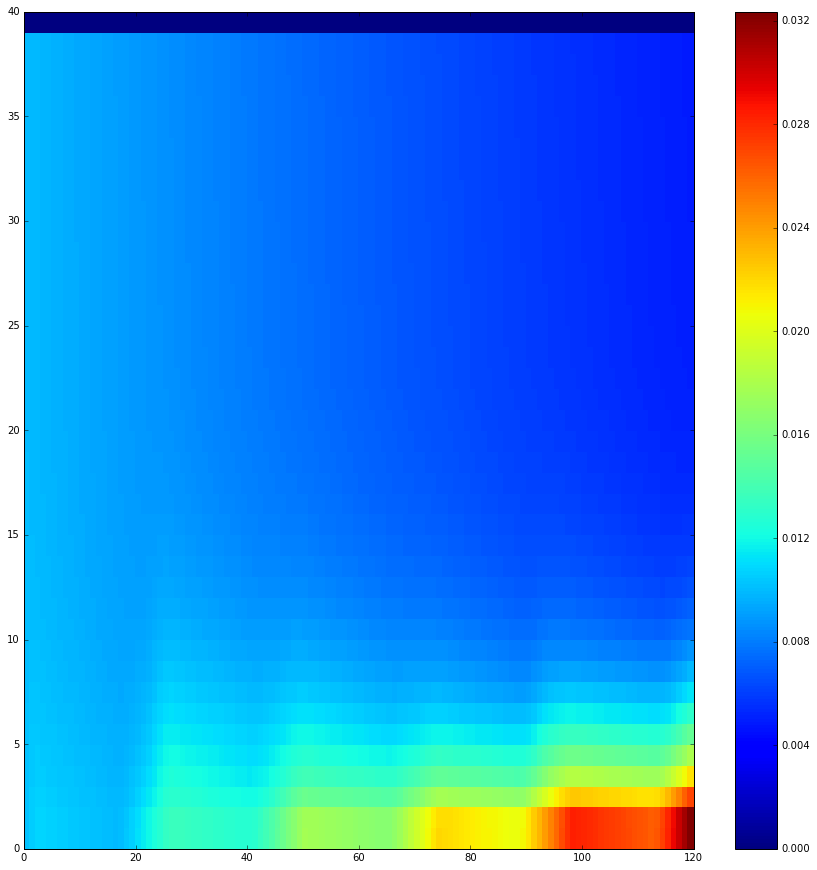

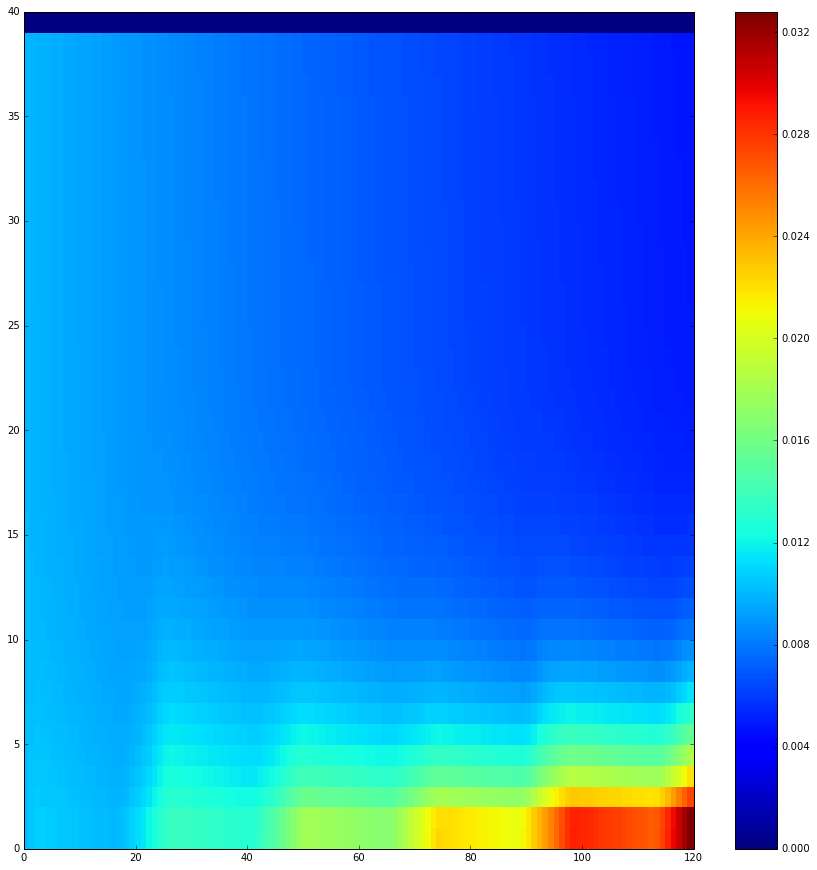

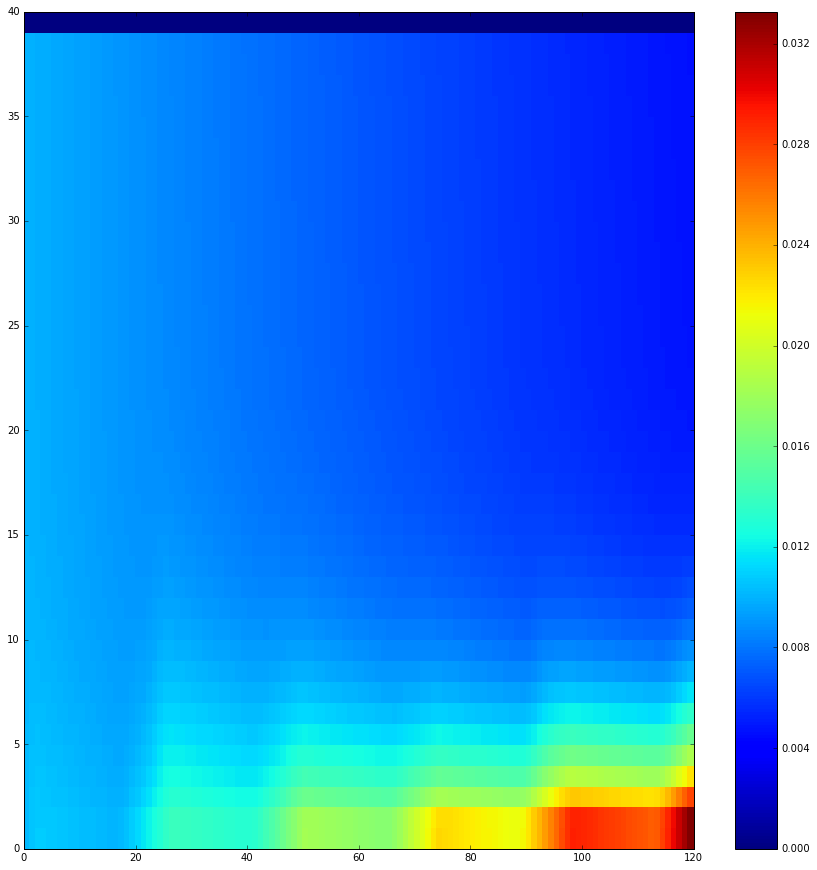

In [34]:
data_subset = ds_alpha_0.PHY.values[:,:,2,2].T
fig, ax = plt.subplots(1, 1,figsize=(15,15))
mesh = ax.pcolormesh(data_subset)
fig.colorbar(mesh)
mesh.set_clim(vmin=data_subset.min(), vmax=data_subset.max())

data_subset = ds_alpha_half.PHY.values[:,:,2,2].T
fig, ax = plt.subplots(1, 1,figsize=(15,15))
mesh = ax.pcolormesh(data_subset)
fig.colorbar(mesh)
mesh.set_clim(vmin=data_subset.min(), vmax=data_subset.max())

data_subset = ds_alpha_1.PHY.values[:,:,2,2].T
fig, ax = plt.subplots(1, 1,figsize=(15,15))
mesh = ax.pcolormesh(data_subset)
fig.colorbar(mesh)
mesh.set_clim(vmin=data_subset.min(), vmax=data_subset.max())

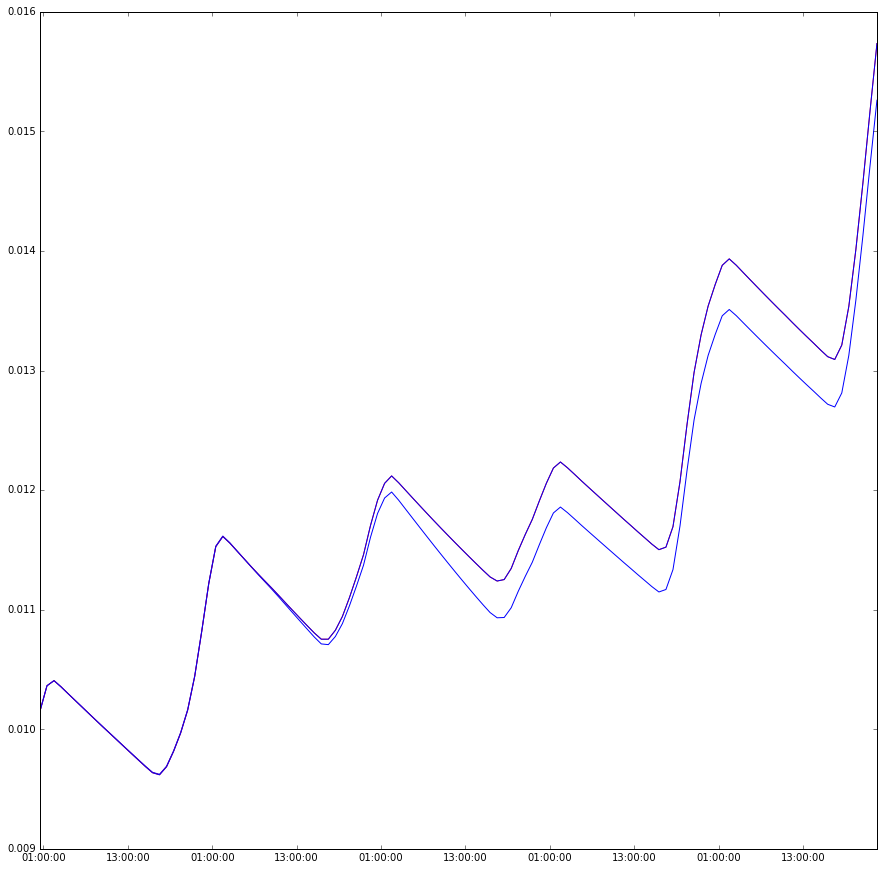

In [36]:
fig, ax = plt.subplots(1, 1,figsize=(15,15))
plt.plot(ds_alpha_1.time_centered.values, ds_alpha_0.PHY.values[:,5,2,2], 'b-')
plt.plot(ds_alpha_half.time_centered.values, ds_alpha_1.PHY.values[:,5,2,2], 'r-')
plt.plot(ds_alpha_0.time_centered.values, ds_alpha_1.PHY.values[:,5,2,2], '-')

In [37]:
ds_alpha_0.PHY.values[:,5,2,2] - ds_alpha_half.PHY.values[:,5,2,2]

array([  2.79396772e-09,   1.86264515e-08,   5.12227416e-08,
         9.87201929e-08,   1.62981451e-07,   2.42143869e-07,
         3.37138772e-07,   4.47034836e-07,   5.70900738e-07,
         7.08736479e-07,   8.58679414e-07,   1.01700425e-06,
         1.18277967e-06,   1.35321170e-06,   1.51991844e-06,
         1.67917460e-06,   1.82446092e-06,   1.96509063e-06,
         2.11223960e-06,   2.25193799e-06,   2.36462802e-06,
         2.45030969e-06,   2.50712037e-06,   2.50805169e-06,
         2.42516398e-06,   2.23703682e-06,   1.87475234e-06,
         1.32247806e-06,   6.48200512e-07,  -1.51805580e-07,
        -1.10082328e-06,  -2.23238021e-06,  -3.51388007e-06,
        -4.96394932e-06,  -6.56303018e-06,  -8.36979598e-06,
        -1.03851780e-05,  -1.25598162e-05,  -1.49281695e-05,
        -1.75060704e-05,  -2.02748924e-05,  -2.33128667e-05,
        -2.67364085e-05,  -3.06591392e-05,  -3.50894406e-05,
        -3.98010015e-05,  -4.48888168e-05,  -5.06248325e-05,
        -5.66756353e-05,